<a href="https://colab.research.google.com/github/jackarl/programacion_analitica/blob/main/PracticaRegresionLinealSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Regresión Lineal Simple con Scikit-Learn
---


## Datos del Estudiante

*   Apellidos y Nombre: Ortiz Romo Carlos Jacob
*   Matrícula: 255873

---

## Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar la regresión lineal simple utilizando Scikit-Learn para modelar la relación entre dos variables numéricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlación entre variables** y evaluar el desempeño del modelo mediante métricas como el MSE, RMSE y R².


Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.





## 🔧 Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.



In [2]:
# Escribe tu código aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

2. Carga el archivo `restaurantes.csv`
3. Muestra las primeras filas del dataframe.


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Entregable_programacion/Regresion lineal/restaurantes.csv')
df.head(5)

,poblation,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


4. Describe estadísticamente el conjunto de datos.

In [4]:
df.describe()

,poblation,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


##  Parte 2: Análisis exploratorio y relación entre variables

### 2.1 Diagrama de Dispersión
1. Grafica un **diagrama de dispersión** entre `poblation` y `profit`
2. Responde:  
**¿La relación entre las variables parece lineal? ¿Por qué?**

Relacion positiva proporcionalidad directa ya denota pendiente positiva

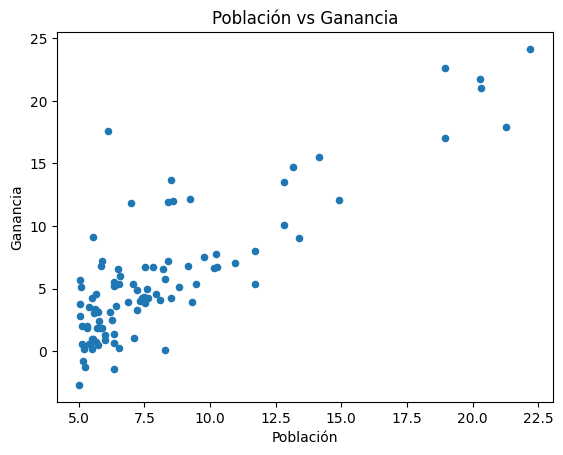

In [5]:
# Diagrama de dispersión
df.plot(kind='scatter', x='poblation', y='profit')
plt.title('Población vs Ganancia')
plt.xlabel('Población')
plt.ylabel('Ganancia')
plt.show()


### 2.2: Cálculo e interpretación de la correlación
1. Calcula e imprime el **coeficiente de correlación de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:
- ¿Qué tan fuerte es la relación?
- ¿Es positiva o negativa?
- ¿Es coherente con el gráfico anterior?

Correlacion fuerte y significativa, proporcionalmente directa coherente con grafico anterior

In [6]:
# Cálculo de correlación
df[['poblation','profit']].corr()

,poblation,profit
poblation,1.000000,0.837873
profit,0.837873,1.000000


In [7]:
from scipy.stats import pearsonr
# Calcular correlación de Pearson
corr, p_value = pearsonr(df['poblation'], df['profit'])

print(f'Coeficiente de correlación de Pearson: {corr}')
print(f'Valor p: {p_value}')

Coeficiente de correlación de Pearson: 0.8378732325263409
Valor p: 1.0232099778760897e-26


In [8]:
df_simple = df[['poblation','profit']]
x_mean = df_simple['poblation'].mean()
y_mean = df_simple['profit'].mean()

covar = np.sum((df_simple['poblation']-x_mean)*(df_simple['profit']-y_mean))
var_x = np.sum((df_simple['poblation']-x_mean)**2)
beta1 = covar/var_x
beta0 = y_mean - beta1*x_mean # pendiente m, tambien significa la covarianza
print(f'La recta de regresion es: y = {round(beta0,4)} + {round(beta1,4)}x')            # corte en y

La recta de regresion es: y = -3.8958 + 1.193x


## Parte 3: Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes
1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?
4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema?

In [9]:
# Construcción del modelo  y Coeficientes del modelo
Y_pred = beta0 + beta1*df['poblation']

import numpy as numpy
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[['poblation']], df['profit'])

print(f'Intercepto: {model.intercept_}')
print(f'Pendiente: {model.coef_[0]}')

Intercepto: -3.8957808783118484
Pendiente: 1.1930336441895932


### 3.2 Visualización del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
2. Asegúrate de incluir leyenda y títulos.

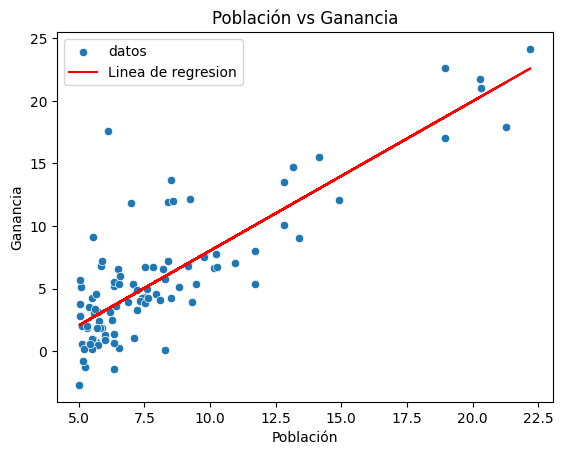

In [10]:
# Visualización del modelo ajustado
sns.scatterplot(x=df_simple['poblation'], y=df_simple['profit'], label = 'datos')
plt.plot(df['poblation'], Y_pred, color='red', label='Linea de regresion')
plt.legend()
plt.title('Población vs Ganancia')
plt.xlabel('Población')
plt.ylabel('Ganancia')
plt.legend()
plt.show()

## Parte 4: Supuestos del modelo de regresión lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¿Los residuos siguen una distribución normal?

Residuos cuenta con distribucion normal con un ligero sesgo hacia al derecha

<Axes: xlabel='residuos', ylabel='Count'>

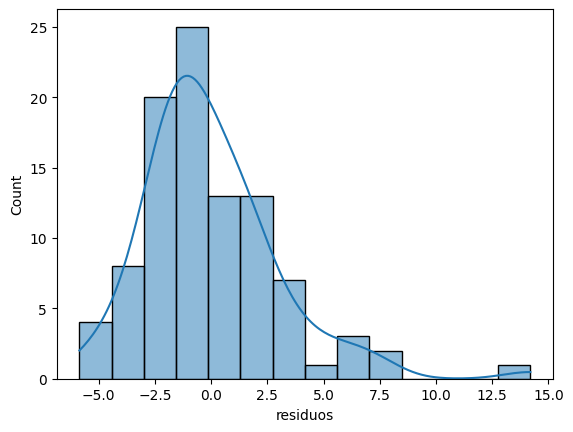

In [11]:
# Normalidad de los residuos

df['residuos'] = df['profit'] - Y_pred
sns.histplot(df['residuos'], kde=True)


### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón?

Intercepto: -3.8957808783118484
Pendiente: 1.1930336441895932


Text(0, 0.5, 'Residuos')

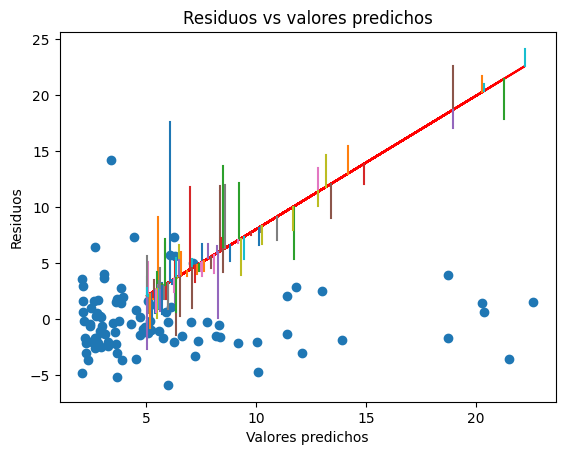

In [12]:
# Gráfico de residuos vs predichos
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[['poblation']], df['profit'])
Y_pred = model.predict(df[['poblation']])
print(f'Intercepto: {model.intercept_}')
print(f'Pendiente: {model.coef_[0]}')

df.loc[:, 'y_pred'] = model.predict(df[['poblation']])
df.loc[:, 'residuos'] = df['profit'] - df['y_pred']
plt.scatter(df['y_pred'], df['residuos'])
plt.plot(df['poblation'],df['y_pred'], color='red')



for i in range(len(df)):
   plt.plot([df.loc[i,'poblation'],df.loc[i,'poblation']],[df.loc[i,'profit'],df.loc[i,'y_pred']])



plt.title('Residuos vs valores predichos')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')


### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gráfico:
a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal
b) Desviaciones sistemáticas indican asimetría o colas pesadas.

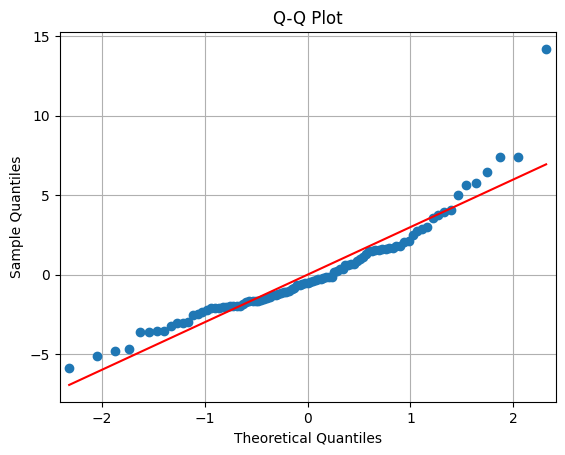

In [19]:
# Q-Q Plot
import statsmodels.api as sm
sm.qqplot(df['residuos'], line='s')
plt.title('Q-Q Plot')
plt.grid(True)
plt.show()


## Parte 5: Evaluación del modelo
1. Calcula las métricas:
- MSE
- RMSE
- R²
2. Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?

In [14]:
# Evaluación del modelo
print(f'MSE: {mean_squared_error(df_simple["profit"], Y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(df_simple["profit"], Y_pred))}')
print(f'R^2: {r2_score(df_simple["profit"], Y_pred)}')

MSE: 8.953942751950358
RMSE: 2.9923139460876023
R^2: 0.7020315537841397


## Parte 6: Conclusiones
Responde con tus propias palabras:
- ¿Qué tan útil consideras el modelo?
- ¿Qué limitaciones encuentras?
- ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.

Cuenta con R2 del 85% de correlacion entre variables por lo que se puede considera como aceptable para utilizacion. La grafica Q-Q indica que los residuos o error se ajusta a la linea de regresion, excepto un outlier